# Running using param. dict.

[This note-book is in oceantracker/tutorials_how_to/]

The earlier notebook showed how to set parameters and run using the helper class. Here we exploit the flexibility to run Oceantracker directly using a parameter dictionary built in code or read from a file. The dictionary can be built using {'pulse_size':10} or dict(pulse=10) approaches.
   

## Build param. dict. with code

The below extends the minimal_example, shows two ways to build a parameter dictionary and different ways to run OceanTracker, from code or command line.  



In [1]:
# build a more complex dictionary of parameters using code
params={
    'output_file_base' :'param_test1',      # name used as base for output files
    'root_output_dir':'output',             #  output is put in dir   'root_output_dir'/'output_file_base'
    'time_step' : 120,  #  2 min time step as seconds  
    'reader': dict(input_dir='../demos/demo_hindcast/schsim3D',  # folder to search for hindcast files, sub-dirs will, by default, also be searched
                  file_mask= 'demo_hindcast_schisim3D*.nc',    # the file mask of the hindcast files
                    ),
    # add a list of release groups, the release locations from two points, 
    #       particle_release_groups are a list of one or more release groups 
    #               (ie locations where particles are released at the same times and locations) 
    'release_groups': [ # class_name not uses as PointRelease is the default
                {'name': 'my_release_point', # optional name to refer to in code
                'points':[[1595000, 5482600],
                          [1599000, 5486200]],      # must be an N by 2 or 3 or list, convertible to a numpy array
                'release_interval': 3600,           # seconds between releasing particles
                'pulse_size': 10,                   # number of particles released each release_interval
                },
                {'class_name': 'PolygonRelease', # use a polygon release
                                    'points':[   [1597682.1237, 5489972.7479],
                                                    [1598604.1667, 5490275.5488],
                                                    [1598886.4247, 5489464.0424],
                                                    [1597917.3387, 5489000],
                                                    [1597300, 5489000], [1597682.1237, 5489972.7479]],
                                    'release_interval': 7200,           # seconds between releasing particles
                                    'pulse_size': 20,                   # number of particles released each release_interval
                                    },    
                ],
    'resuspension' : dict(critical_friction_velocity= .005), # only re-suspend particles if friction vel. exceeds this value
    
    # list of velocity_modifiers are a set of velocities added to  water velocity give in  hydrodynamic model's 
    'velocity_modifiers' : [   # here a fall velocity with given mean and variance is added to the computation 
                {'name':'fall_velocity', #optional name
                 'class_name' : 'TerminalVelocity', 
                 'value': -0.001,
                 'variance': 0.0002} # fall velocity has this variance around value
                        ],                      
        }

# write params to build on for later examples
from oceantracker.util import json_util, yaml_util
json_util.write_JSON('./example_param_files/param_test1.json', params) 
yaml_util.write_YAML('./example_param_files/param_test1.yaml', params)

  ### Show parameters in yaml format

  yaml format has no brackets/braces and relies on tab indenting to nest items

In [2]:
# show the params in yaml format
import yaml
p = yaml_util.read_YAML('./example_param_files/param_test1.yaml')
print( yaml.dump(p))

output_file_base: param_test1
reader:
  file_mask: demo_hindcast_schisim3D*.nc
  input_dir: ../demos/demo_hindcast/schsim3D
release_groups:
- name: my_release_point
  points:
  - - 1595000
    - 5482600
  - - 1599000
    - 5486200
  pulse_size: 10
  release_interval: 3600
- class_name: PolygonRelease
  points:
  - - 1597682.1237
    - 5489972.7479
  - - 1598604.1667
    - 5490275.5488
  - - 1598886.4247
    - 5489464.0424
  - - 1597917.3387
    - 5489000
  - - 1597300
    - 5489000
  - - 1597682.1237
    - 5489972.7479
  pulse_size: 20
  release_interval: 7200
resuspension:
  critical_friction_velocity: 0.005
root_output_dir: output
time_step: 120
velocity_modifiers:
- class_name: TerminalVelocity
  name: fall_velocity
  value: -0.001
  variance: 0.0002



## Run OceanTracker from parameters

There are several ways to run OceanTracker 
    
1) By coding 
    - build parameters in code and run

    - or coding to read parameter file and then run  

2) Without coding

    - run from command line with parameter file which is built by editing a json/yaml text file

Note:

There are many ways to run the code, eg. with IDE like Pycharm, Visual Studio Code. It can also, as here, be run in iPython notebooks. However the way notebooks are implemented can sometimes result in issues: 

  -  errors  when running Oceantracker a second time or other unexpected behavior, due to shared memory space, fix by reloading the kernel

  - if using note books on Windows, it is not possible to run Oceantracker cases in parallel, without a work around  given in a later "how to".


## Run with code built params.

Is line below!

In [3]:
# run oceantracker using param dict built in cells above
from oceantracker import main

case_info_file_name = main.run(params) 
# case_info file is the name of a json file useful in plotting results 

Main      Python version: 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:40:08) [MSC v.1938 64 bit (AMD64)]
Main ----------------------------------------------------------------------
Main OceanTracker starting main:
Main     Starting package set up
Main         -  Built OceanTracker package tree,	  1.434 sec
Main         -  Built OceanTracker sort name map,	  0.000 sec
Main     -  Done package set up to setup ClassImporter,	  1.434 sec
Main Output is in dir "c:\Work\ot_install_test\oceantracker\tutorials_how_to\output\param_test1"
Main       hint: see for copies of screen output and user supplied parameters, plus all other output
Main     >>> Note: to help with debugging, parameters as given by user  are in "user_given_params.json"
Main ----------------------------------------------------------------------
Main  OceanTracker version 0.50.0009-2024-03-30 - preliminary setup
Main   - Found input dir "../demos/demo_hindcast/schsim3D"
Main   - found hydro-model files of type  

RuntimeError: Requested MovieWriter (ffmpeg) not available

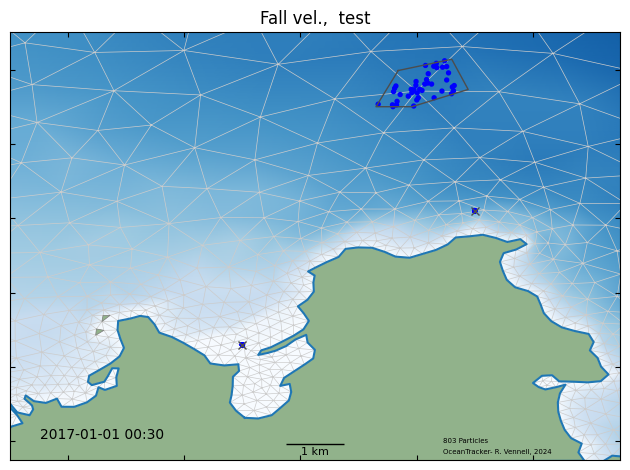

In [4]:
# plot animation of results
from matplotlib import pyplot as plt
from plot_oceantracker.plot_tracks import animate_particles
from read_oceantracker.python import  load_output_files
from IPython.display import HTML # show animation in note book

# read particle track data into a dictionary using case_info_file_name
tracks = load_output_files.load_track_data(case_info_file_name)

ax= [1591000, 1601500, 5479500, 5491000]  # area to plot
# animate particles
anim = animate_particles(tracks, axis_lims=ax,title='Fall vel.,  test' , 
                         show_dry_cells=True, show_grid=True, show=False) # use ipython to show video, rather than matplotlib plt.show()

HTML(anim.to_html5_video())# this is slow to build!

## Run by reading param. file


## Run from command line 

Run without coding from command lin bu using a parameter file pre-built in a text editor.

From within an activated oceantracker conda environment, run  command line below.

On Windows, do this within an anaconda/miniconda prompt window with an activated environment.

eg. run "run_oceantracker.py" script in the oceantracker/oceantracker directory with command

``python  ../oceantracker/run_oceantracker.py ./example_param_files/param_test1.json``

In [2]:
!python  ../oceantracker/run_ot_cmd_line.py ./example_param_files/param_test1.json

Main      Python version: 3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:40:08) [MSC v.1938 64 bit (AMD64)]
Main ----------------------------------------------------------------------
Main OceanTracker starting main:
Main     Starting package set up
Main         -  Built OceanTracker package tree,	  0.962 sec
Main         -  Built OceanTracker sort name map,	  0.000 sec
Main     -  Done package set up to setup ClassImporter,	  0.962 sec
Main >>> Warning: Deleted contents of existing output dir
Main Output is in dir "c:\Work\ot_install_test\oceantracker\tutorials_how_to\output\param_test1"
Main       hint: see for copies of screen output and user supplied parameters, plus all other output
Main     >>> Note: to help with debugging, parameters as given by user  are in "user_given_params.json"
Main ----------------------------------------------------------------------
Main  OceanTracker version 0.50.0009-2024-03-30 - preliminary setup
Main   - Found input dir "../demos/demo_hin

### Options when running at command line

These allow

- redefining the input and output dirs given within parameter file, which may have been built for a different location
- limiting the run duration or the number of parallel cases during testing

the full arguments are below

In [3]:
!python ../oceantracker/run_ot_cmd_line.py -h

usage: run_ot_cmd_line.py [-h] [--input_dir INPUT_DIR]
                          [--root_output_dir ROOT_OUTPUT_DIR]
                          [--processors PROCESSORS] [--duration DURATION]
                          [--cases CASES] [-debug]
                          param_file

positional arguments:
  param_file            json or yaml file of input parameters

options:
  -h, --help            show this help message and exit
  --input_dir INPUT_DIR
                        overrides dir for hindcast files given in param file
  --root_output_dir ROOT_OUTPUT_DIR
                        overrides root output dir given in param file
  --processors PROCESSORS
                        overrides number of processors in param file
  --duration DURATION   in seconds, overrides model duration in seconds of all
                        of cases, useful in testing
  --cases CASES         only runs first "cases" of the case_list, useful in
                        testing
  -debug                gives